In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [26]:
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13
plt.ion()

In [27]:
def f(z):
    return np.power(z, 2) -1
    
f(0)

-1

In [28]:
z = [4, 1-0.2j, 1.6]
f(z)

array([15.  +0.j , -0.04-0.4j,  1.56+0.j ])

In [29]:
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))

In [30]:
mesh = y * 1j + x
mesh

array([[-10.        -10.j        ,  -8.94736842-10.j        ,
         -7.89473684-10.j        ,  -6.84210526-10.j        ,
         -5.78947368-10.j        ,  -4.73684211-10.j        ,
         -3.68421053-10.j        ,  -2.63157895-10.j        ,
         -1.57894737-10.j        ,  -0.52631579-10.j        ,
          0.52631579-10.j        ,   1.57894737-10.j        ,
          2.63157895-10.j        ,   3.68421053-10.j        ,
          4.73684211-10.j        ,   5.78947368-10.j        ,
          6.84210526-10.j        ,   7.89473684-10.j        ,
          8.94736842-10.j        ,  10.        -10.j        ],
       [-10.         -8.94736842j,  -8.94736842 -8.94736842j,
         -7.89473684 -8.94736842j,  -6.84210526 -8.94736842j,
         -5.78947368 -8.94736842j,  -4.73684211 -8.94736842j,
         -3.68421053 -8.94736842j,  -2.63157895 -8.94736842j,
         -1.57894737 -8.94736842j,  -0.52631579 -8.94736842j,
          0.52631579 -8.94736842j,   1.57894737 -8.94736842j,
       

In [31]:
output = np.power(np.abs(f(mesh)), 2) -1
output

array([[4.00000000e+04, 3.24598369e+04, 2.64253589e+04, 2.16608405e+04,
        1.79600218e+04, 1.51461085e+04, 1.30717720e+04, 1.16191496e+04,
        1.06998442e+04, 1.02549244e+04, 1.02549244e+04, 1.06998442e+04,
        1.16191496e+04, 1.30717720e+04, 1.51461085e+04, 1.79600218e+04,
        2.16608405e+04, 2.64253589e+04, 3.24598369e+04, 4.00000000e+04],
       [3.23800585e+04, 2.56354693e+04, 2.03081683e+04, 1.61624297e+04,
        1.29919936e+04, 1.06200658e+04, 8.89931784e+03, 7.71188680e+03,
        6.96937562e+03, 6.61285288e+03, 6.61285288e+03, 6.96937562e+03,
        7.71188680e+03, 8.89931784e+03, 1.06200658e+04, 1.29919936e+04,
        1.61624297e+04, 2.03081683e+04, 2.56354693e+04, 3.23800585e+04],
       [2.62746664e+04, 2.02372542e+04, 1.55385548e+04, 1.19428427e+04,
        9.24385786e+03, 7.26480613e+03, 5.85835898e+03, 4.90665357e+03,
        4.32129281e+03, 4.04334528e+03, 4.04334528e+03, 4.32129281e+03,
        4.90665357e+03, 5.85835898e+03, 7.26480613e+03, 9.2438

AttributeError: 'Axes3D' object has no attribute 'set_zlable'

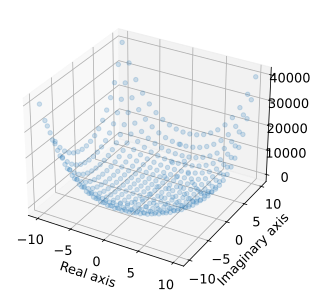

In [32]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter(x, y, output, alpha = 0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlable('Absolute value')
ax.set_title('One lteration: $f(z) = z^2 - 1$');

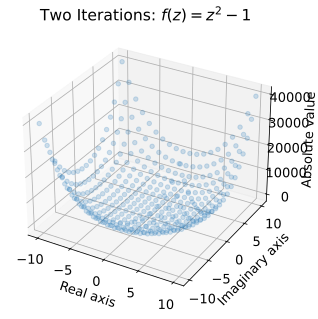

In [33]:
output = np.abs(f(f(mesh))) # 함수 두 번 반복

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$');

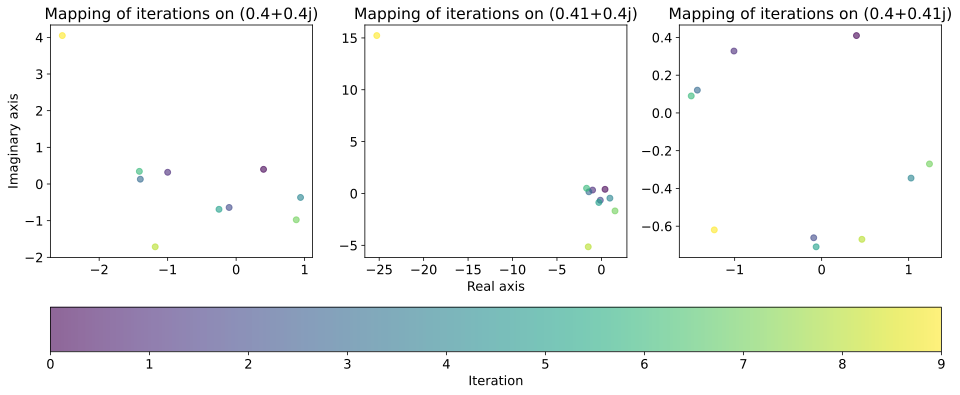

In [34]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros(
    (num_iter+1, selected_values.shape[0]),  # 10X3 Zero 배열 생성
    dtype=complex  # 데이터 타입: 복소수
)
outputs[0] = selected_values   # 함수 초기 조건

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])  # 10번 함수 반복하는 동안 각 결과를 저장

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(
        data.real,  # 실수부
        data.imag,  # 허수부
        c=range(data.shape[0]), 
        alpha=0.6
    )
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location='bottom', label='Iteration');

In [35]:
def divergence_rate(mest, num_iter=10, radius=2):

    z = mesh.copy()
    diverge_len = np.zeros(mesh.shape)

    for i in range(num_iter):
        conv_mask = np.abs(z) < radius

        diverge_len[conv_mask] += 1

        z[conv_mask] = f(z[conv_mask])

    return diverge_len
        
        



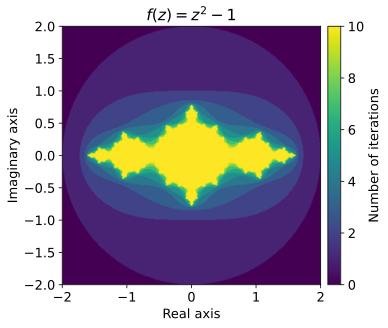

In [36]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2-1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');